In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.layers import Input, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

2025-05-03 12:19:53.707487: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [3]:
tf.keras.utils.set_random_seed(12)

batch_size = 32
img_height = img_width =224

In [4]:
directory = "/kaggle/input/pcos-detection-using-ultrasound-images/data/train"
test = "/kaggle/input/pcos-detection-using-ultrasound-images/data/test" 

In [5]:
import os
print(os.getcwd())  # This shows where Python is looking

/Users/hari/Desktop/College/Machineeeeeeeeee


In [6]:
directory = "/Users/hari/Desktop/College/Machineeeeeeeeee/data/train"
test = "/Users/hari/Desktop/College/Machineeeeeeeeee/data/test" 

In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    #class_names=None,
    shuffle=True,
    seed=12,
    validation_split= 0.15,
    subset="training",
    image_size=(img_height, img_width),

    batch_size=batch_size)

Found 1924 files belonging to 2 classes.
Using 1636 files for training.


2025-05-03 12:20:06.842434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


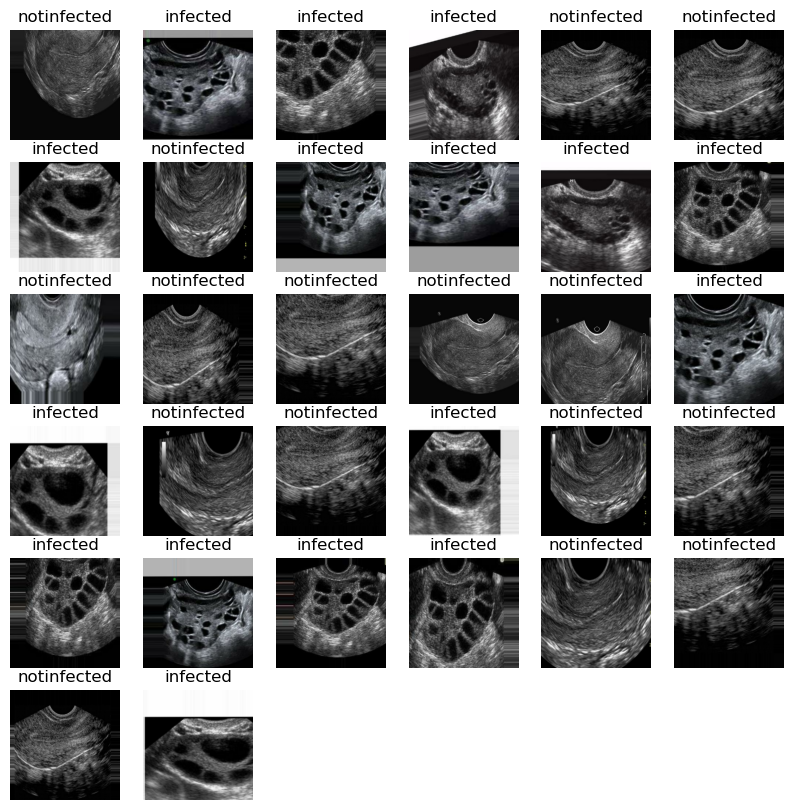

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [17]:
# The desired result was not achieved
"""
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    #class_names=None,
    shuffle=True,
    seed=12,
    validation_split= 0.15,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    validation_split= 0.15,
    seed=12,
    subset="validation",
    image_size=(img_height, img_width),
    #label_mode="categorical",
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)
"""

# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             #width_shift_range=0.2,
                             #height_shift_range=0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=20,
                             validation_split=0.2,
                             fill_mode='nearest'
                             )
# prepare an iterators for each dataset
train_ds = datagen.flow_from_directory(directory, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=batch_size,
                                       subset='training',
                                       seed=12)
# prepare an iterators for each dataset
val_ds = datagen.flow_from_directory( directory, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=batch_size,
                                       subset='validation',
                                       seed=12)

Found 1540 images belonging to 2 classes.
Found 384 images belonging to 2 classes.


In [19]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1932 files belonging to 2 classes.


In [21]:
model = Sequential()

model.add(Conv2D(12, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(8, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(4, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(2,activation='softmax'))

opt=Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
earlyStopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1,patience=15)

In [25]:
history = model.fit( 
    train_ds,
    validation_data=val_ds,
    callbacks=[earlyStopping],
    batch_size=batch_size,
    verbose=1,
    epochs=20)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 44s 858ms/step - accuracy: 0.7229 - loss: 0.5397 - val_accuracy: 0.8958 - val_loss: 0.3244
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 813ms/step - accuracy: 0.9565 - loss: 0.1376 - val_accuracy: 0.9948 - val_loss: 0.0260
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 797ms/step - accuracy: 0.9941 - loss: 0.0147 - val_accuracy: 0.9896 - val_loss: 0.0608
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 805ms/step - accuracy: 0.9991 - loss: 0.0053 - val_accuracy: 0.9766 - val_loss: 0.0761
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 810ms/step - accuracy: 0.9954 - loss: 0.0166 - val_accuracy: 0.9870 - val_loss: 0.0452
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 800ms/step - accuracy: 0.9905 - loss: 0.0245 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 804ms/step - accuracy: 0.9962 - loss: 0.0117 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 803ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accu

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 12)   │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 12)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 8)    │         2,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 4)      │           804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         6,274 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,196 (121.86 KB)

 Trainable params: 10,398 (40.62 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,798 (81.25 KB)

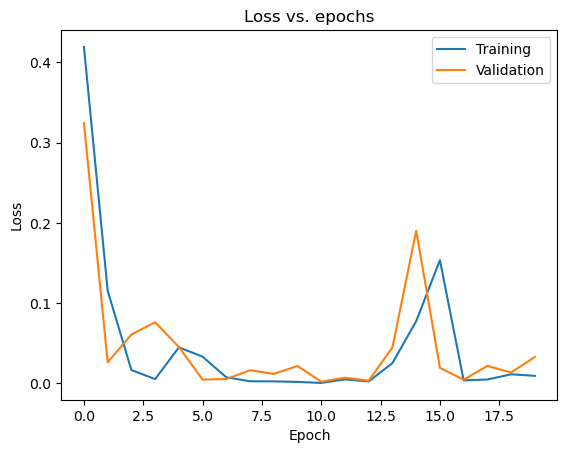

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

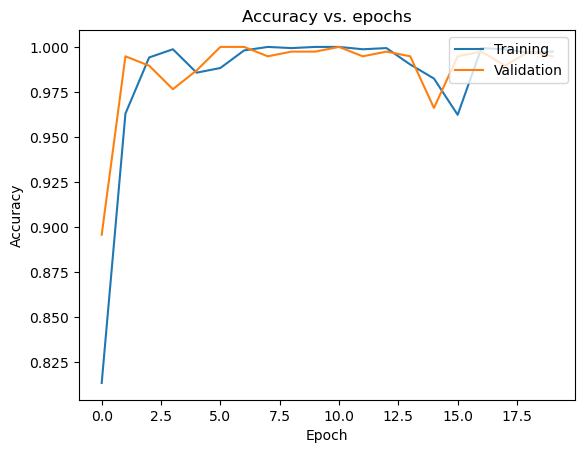

In [31]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [33]:
model.evaluate(val_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 533ms/step - accuracy: 0.9797 - loss: 0.0337


[0.02011043205857277, 0.9895833134651184]

In [35]:
model.save('model.h5')

In [37]:
#Predict probabilities for the validation set (used as test here)
image_probs = model.predict(val_ds)
 
# 💾 Save predictions for multimodal fusion
np.save('image_probs.npy', image_probs)
 
# 🔁 Optionally, also save the labels for verification
labels = val_ds.classes  # true labels in correct order (since shuffle=False by default for validation)
np.save('labels_image.npy', labels)
 

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 533ms/step
